In [1]:
# Load packages 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib_venn import venn3

# 1 Import DEG UP & DOWN data 

In [2]:
# IMPORT raw data 
deg_na = pd.read_csv('11_identify_DEG/comp_anoxia_normoxia.csv', header=0, sep=',').assign(regulation='up', condition='Normoxia to Anoxia')
deg_nr = pd.read_csv('11_identify_DEG/comp_reoxygenation_normoxia.csv', header=0, sep=',').assign(regulation='up', condition='Normoxia to Reoxygenation')
deg_ar = pd.read_csv('11_identify_DEG/comp_anoxia_reoxygenation.csv', header=0, sep=',').assign(regulation='up', condition='Anoxia to Reoxygenation')

In [3]:
# drop rows that contains NaN in the padj column 
deg_na = deg_na.dropna(subset=['padj'])
deg_nr = deg_nr.dropna(subset=['padj'])
deg_ar = deg_ar.dropna(subset=['padj'])

# filter for NaN in log2FoldChange column 
deg_na = deg_na.dropna(subset=['log2FoldChange'])
deg_nr = deg_nr.dropna(subset=['log2FoldChange'])
deg_ar = deg_ar.dropna(subset=['log2FoldChange'])

In [5]:
# set threshold for fold change 
fold_threshold = 1.3 
p_threshold = 0.05

# 2 Vulcano Plot DEGs 

In [6]:
# merge the dataframes and add column with name of comparison
deg = pd.concat([deg_na, deg_nr, deg_ar])

# calculate -log10(padj) for each comparison
deg['-log10p'] = -np.log10(deg['padj'])

# introduce color code 
deg['color'] = 0

# color code for significant genes
deg.loc[abs(deg['log2FoldChange']) >= np.log2(fold_threshold) , 'color'] +=1
deg.loc[deg['padj'] <= p_threshold , 'color'] +=1

# convert number code into str for Legend labels 
deg.loc[deg['color'] <= 1, 'color'] = 'Not Differentially Expressed'
deg.loc[deg['color'] == 2, 'color'] = 'Differentially Expressed'

In [9]:
# Vulcano plot

def add_deg_number(data, **kwargs):
    """Add the number of DEGs to each subplot."""
    if np.all(data['color'] == 'Not Differentially Expressed'):
        return 
    elif np.all(data['color'] == 'Differentially Expressed'):
        pos = sum((data['log2FoldChange'] >= np.log2(fold_threshold)))
        neg = sum((data['log2FoldChange'] <= -np.log2(fold_threshold)))
        plt.text(x=-5, y=80, s=f'downregulated: {neg}', fontsize=12, ha='center', va='center')
        plt.text(x=+5, y=80, s=f'upregulated: {pos}', fontsize=12, ha='center', va='center')



/home/maggy/anaconda3/envs/rnaseq/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
/home/maggy/anaconda3/envs/rnaseq/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
/home/maggy/anaconda3/envs/rnaseq/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
/home/maggy/anaconda3/envs/rnaseq/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


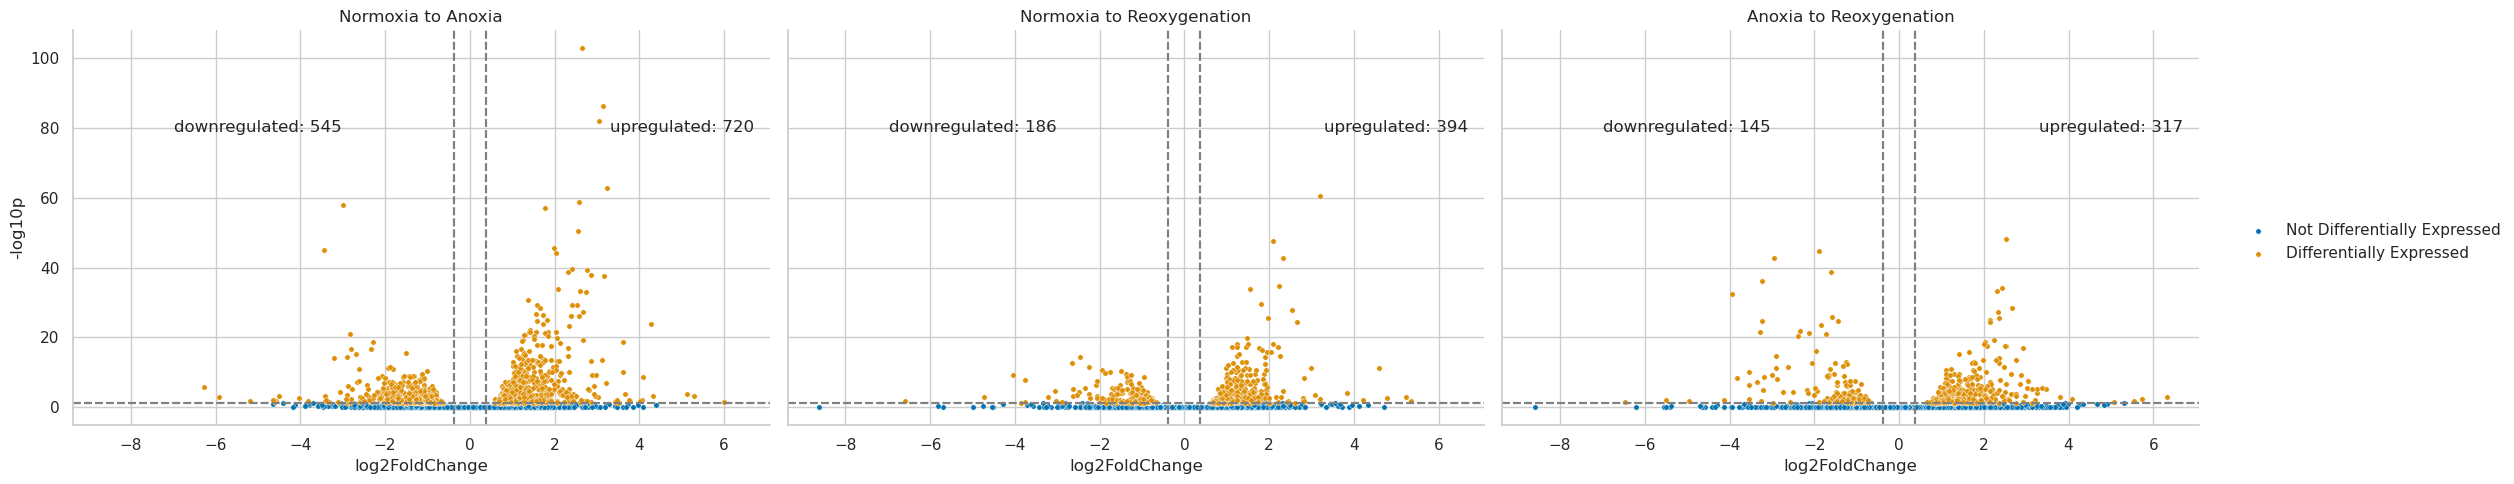

In [10]:
# create subplot for 3 plots 
sns.set_theme(style='whitegrid')
g = sns.FacetGrid(deg, col="condition", hue='color', palette='colorblind', height=5, aspect=1.5)
g.map(sns.scatterplot, 'log2FoldChange','-log10p', s=15)
g.add_legend(title='')
g.refline(y=-np.log10(p_threshold), linestyle='--', linewidth=1.5, color='grey')
g.refline(x = np.log2(fold_threshold), linestyle='--', linewidth=1.5, color='grey')
g.refline(x = -np.log2(fold_threshold), linestyle='--', linewidth=1.5, color='grey')
g.set_titles(col_template="{col_name}")
g.map_dataframe(add_deg_number)

# save as png
g.savefig('11_identify_DEG/vulcano_plot_DEG.png', dpi=350, bbox_inches='tight')



# 3 Split UP & DOWN regulated genes 

In [12]:
# split dataframe by log2FoldChange column. positive values are upregulated, negative values are downregulated
deg_na_up = deg_na[(deg_na['log2FoldChange'] >= np.log2(fold_threshold)) & (deg_na['padj'] <= p_threshold )]
deg_na_down = deg_na[(deg_na['log2FoldChange'] <= -np.log2(fold_threshold)) & (deg_na['padj'] <= p_threshold)]
deg_nr_up = deg_nr[(deg_nr['log2FoldChange'] >= np.log2(fold_threshold)) & (deg_nr['padj'] <= p_threshold)]
deg_nr_down = deg_nr[(deg_nr['log2FoldChange'] <= -np.log2(fold_threshold)) & (deg_nr['padj'] <= p_threshold)]
deg_ar_up = deg_ar[(deg_ar['log2FoldChange'] >= np.log2(fold_threshold)) & (deg_ar['padj'] <= p_threshold)]
deg_ar_down = deg_ar[(deg_ar['log2FoldChange'] <= -np.log2(fold_threshold)) & (deg_ar['padj'] <= p_threshold)]


print('deg_na_up:', len(deg_na_up))
print('deg_na_down:', len(deg_na_down))
print('total:', len(deg_na_up) + len(deg_na_down))
print('deg_na:', len(deg_na[(deg_na['padj'] <= 0.05)]))
print('deg_nr_up:', len(deg_nr_up))
print('deg_nr_down:', len(deg_nr_down))
print('total:', len(deg_nr_up) + len(deg_nr_down))
print('deg_nr:', len(deg_nr[(deg_nr['padj'] <= 0.05)]))
print('deg_ar_up:', len(deg_ar_up))
print('deg_ar_down:', len(deg_ar_down))
print('total:', len(deg_ar_up) + len(deg_ar_down))
print('deg_ar:', len(deg_ar[(deg_ar['padj'] <= 0.05)]))

deg_na_up: 720
deg_na_down: 545
total: 1265
deg_na: 1265
deg_nr_up: 394
deg_nr_down: 186
total: 580
deg_nr: 580
deg_ar_up: 317
deg_ar_down: 145
total: 462
deg_ar: 462


In [13]:
# create a dict with the names of the dataframes as keys and the len(dataframe) as value 
# all *_up dataframes should have a positive value in the dict len(dataframe)
# this is used to create a barplot
dict_len = {'deg_na_up': len(deg_na_up), 'deg_na_down': -len(deg_na_down), 'deg_nr_up': len(deg_nr_up), 'deg_nr_down': -len(deg_nr_down), 'deg_ar_up': len(deg_ar_up), 'deg_ar_down': -len(deg_ar_down)}

# 4 Bar Plot

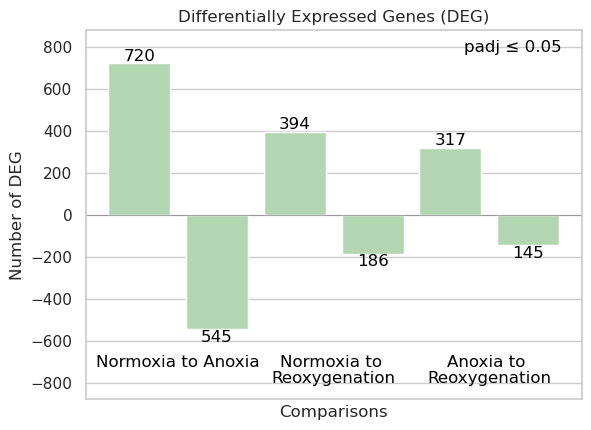

In [27]:

# Sample data
categories = dict_len.keys()
values = dict_len.values()

# Create a bar plot
plt.bar(categories, values, color='skyblue')
plt.title("Differentially Expressed Genes (DEG)")
plt.xlabel("Comparisons")
plt.ylabel("Number of DEG")


# Add labels to the bars
for i, value in enumerate(values):
    if i %2==0:
        plt.text(i, value + 1, str(abs(value)), ha='center', va='bottom', color='black')
    else:
        plt.text(i, value - 1, str(abs(value)), ha='center', va='top', color='black')

# change the color of the bars (first two: blue, second two: red, third two: green)
plt.bar(range(len(dict_len)), list(dict_len.values()), align='center', color='#B2D6B1')

# for colorblind colors: color=['#44AAB2', '#44AAB2', '#2CD19A', '#2CD19A', '#EAB642', '#EAB642' ]

# extand the y scale from -500 to +700
plt.ylim(-880, 880)

# remove x scale
plt.xticks([])

# add a label in the center of the first two bars 
plt.text(0.5, -700, 'Normoxia to Anoxia', ha='center', va='center', color='black')
plt.text(2.5, -700, 'Normoxia to ', ha='center', va='center', color='black')
plt.text(2.5, -780, 'Reoxygenation', ha='center', va='center', color='black')
plt.text(4.5, -700, 'Anoxia to ', ha='center', va='center', color='black')
plt.text(4.5, -780, 'Reoxygenation', ha='center', va='center', color='black')

# add a 0 line 
# the line should be slim and grey
plt.axhline(y=0, color='grey', linestyle='-', linewidth=0.5)

# add a lable in the top right corner of the plot
plt.text(4.8, 800, f"padj ≤ {p_threshold}", ha='center', va='center', color='black')

# Save the figure as a high-quality image (e.g., PNG or PDF)
plt.savefig('11_identify_DEG/DEG_barplot.png', dpi=500, bbox_inches='tight')


# Show the plot
plt.show()


# 5 Venn Plot

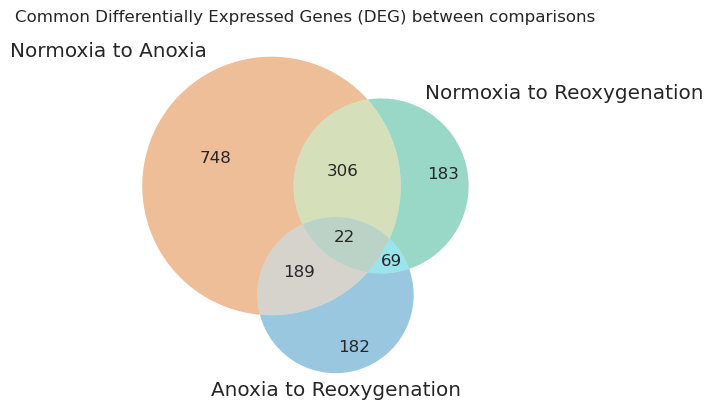

In [29]:
# PLOT VENN DIAGRAM 
sns.set_theme(palette='colorblind')
v = venn3(subsets=(
    set(pd.concat([deg_na_up['Unnamed: 0'], deg_na_down['Unnamed: 0']])), 
    set(pd.concat([deg_nr_up['Unnamed: 0'], deg_nr_down['Unnamed: 0']])), 
    set(pd.concat([deg_ar_up['Unnamed: 0'], deg_ar_down['Unnamed: 0']]))),
    set_labels = ('Normoxia to Anoxia', 'Normoxia to Reoxygenation', 'Anoxia to Reoxygenation'))
plt.title('Common Differentially Expressed Genes (DEG) between comparisons')
plt.savefig('11_identify_DEG/venn_DEG.png', dpi=350)




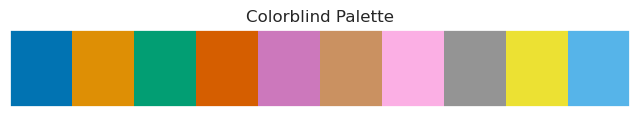

In [30]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set Seaborn to the colorblind theme
sns.set_palette("colorblind")

# Get all colors in the colorblind palette
colorblind_palette = sns.color_palette("colorblind")

# Create a bar plot to display the colors
fig, ax = plt.subplots(figsize=(8, 1))
ax.imshow([colorblind_palette], aspect='auto', extent=(0, len(colorblind_palette), 0, 1))
ax.set_xticks([])
ax.set_yticks([])
ax.set_title('Colorblind Palette')

plt.show()



# 6 Export DEG UP & DOWN as dataframes (to corralte with DMR)

In [35]:
# export deg as dataframe  
pd.concat([deg_na_up, deg_na_down]).to_csv('11_identify_DEG/deg_na.csv', index=False) 
pd.concat([deg_nr_up, deg_nr_down]).to_csv('11_identify_DEG/deg_nr.csv', index=False)
pd.concat([deg_ar_up, deg_ar_down]).to_csv('11_identify_DEG/deg_ar.csv', index=False)


# 7 Match DEG with GO terms 

In [ ]:
# Geneid to GO term
goterm = pd.read_csv('/home/maggy/WholeGenomeBisulphiteSequencing/DNAseq_pipeline/9_DMR_functional_annotation/gene_id_goterms_df_fullgenome.tsv', sep='\t', header=None, names=['gene_id', 'goterm', 'chromosome'])
# GO term to description
godesc = pd.read_csv('/home/maggy/WholeGenomeBisulphiteSequencing/DNAseq_pipeline/9_DMR_functional_annotation/goterm_desc_ref.tsv', sep='\t', header=None, names=['biofunction', 'goterm', 'description'])

In [ ]:
# filter for genes in correlation data for the goterm df 
gotermNA = goterm[goterm['gene_id'].isin(deg_na['Unnamed: 0'])]
gotermNR = goterm[goterm['gene_id'].isin(deg_nr['Unnamed: 0'])]
gotermAR = goterm[goterm['gene_id'].isin(deg_ar['Unnamed: 0'])]

print(gotermNA)
print(gotermNR)
print(gotermAR)

In [ ]:
gotermNA

In [ ]:
godesc

In [ ]:
# merge goterm and godesc on goterm
gotermNA = pd.merge(gotermNA, godesc, on='goterm')
gotermNR = pd.merge(gotermNR, godesc, on='goterm')
gotermAR = pd.merge(gotermAR, godesc, on='goterm')
